# Chain-Break Resolution

- majority_vote (default)
- weighted_random
- discard
- MinimizeEnergy

In [1]:
import random

# Problem instance
N = 50
h = {}
J = {(i, j): random.randint(-1, 1) for i in range(N) for j in range(i+1, N)}
adjacency = {k: 1.0 for k in J.keys()}

In [2]:
from minorminer import find_embedding
from dwave.embedding import embed_ising
from dwave.system import DWaveSampler

# Embed the problem
dw_sampler = DWaveSampler()
embedding = find_embedding(adjacency, dw_sampler.edgelist)
h0, emb_j = embed_ising(h, J, embedding, dw_sampler.adjacency)

In [3]:
from dwave.cloud import Client

# Solve the problem
with Client.from_config() as client:
    solver = client.get_solver()
    computation = solver.sample_ising(h0, emb_j, num_reads=10)

In [4]:
import dimod

bqm = dimod.BinaryQuadraticModel.from_ising(h, J)
chains = [embedding[k] for k in embedding.keys()]

In [5]:
from dwave.embedding.chain_breaks import majority_vote, discard, weighted_random, broken_chains, MinimizeEnergy

# Unembed the problem
cbm = MinimizeEnergy(bqm, embedding)
unembedded_minimize_energy, idx_minimize_energy = cbm(computation.samples, chains)

In [6]:
unembedded_majority_vote, idx_majority_vote = majority_vote(computation.samples, chains)
unembedded_weighted_random, idx_weighted_random = weighted_random(computation.samples, chains)
unembedded_discard, idx_discard = discard(computation.samples, chains)

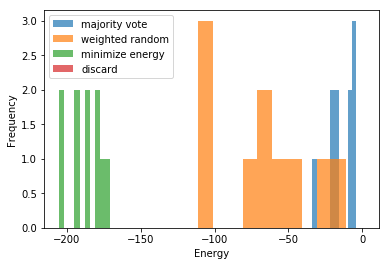

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([dimod.ising_energy(sample, h, J) for sample in unembedded_majority_vote], alpha=0.7, label='majority vote')
plt.hist([dimod.ising_energy(sample, h, J) for sample in unembedded_weighted_random], alpha=0.7, label='weighted random')
plt.hist([dimod.ising_energy(sample, h, J) for sample in unembedded_minimize_energy], alpha=0.7, label='minimize energy')
plt.hist([dimod.ising_energy(sample, h, J) for sample in unembedded_discard], alpha=0.7, label='discard')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
broken_chains(computation.samples, chains)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False,  True,  True,  True,  True,
         True,  True, False,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True, False,
         True,  True,  True,  True,  True, False,  True, False,  True,
        False,  True, False, False,  True],
       [ True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, Fal

In [13]:
from dwave.embedding import unembed_sampleset

embedded = dimod.SampleSet.from_samples(
    computation.samples, dimod.SPIN, computation.energies)
unembed_sampleset(embedded, embedding, bqm)  # default: majority_vote
# unembed_sampleset(embedded, embedding, bqm, chain_break_method=majority_vote)
# unembed_sampleset(embedded, embedding, bqm, chain_break_method=weighted_random)
# unembed_sampleset(embedded, embedding, bqm, chain_break_method=discard)

SampleSet(rec.array([([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], -17., 1),
           ([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],  -7., 1),
           ([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],  -6., 1),
           ([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], -20., 1),
           ([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], -19., 1),
           ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [16]:
unembed_sampleset(embedded, embedding, bqm, chain_break_method=cbm)  # cbm = MinimizeEnergy(bqm, embedding)

SampleSet(rec.array([([ 1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1], -179., 1),
           ([-1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1], -179., 1),
           ([-1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1], -187., 1),
           ([ 1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1], -193., 1),
           ([ 1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -